In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
df = pd.read_csv ("CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
(df.isnull().sum() * 100/df.shape[0]).sort_values(ascending = False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
CUST_ID                             0.000000
BALANCE                             0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE                        0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

<Axes: >

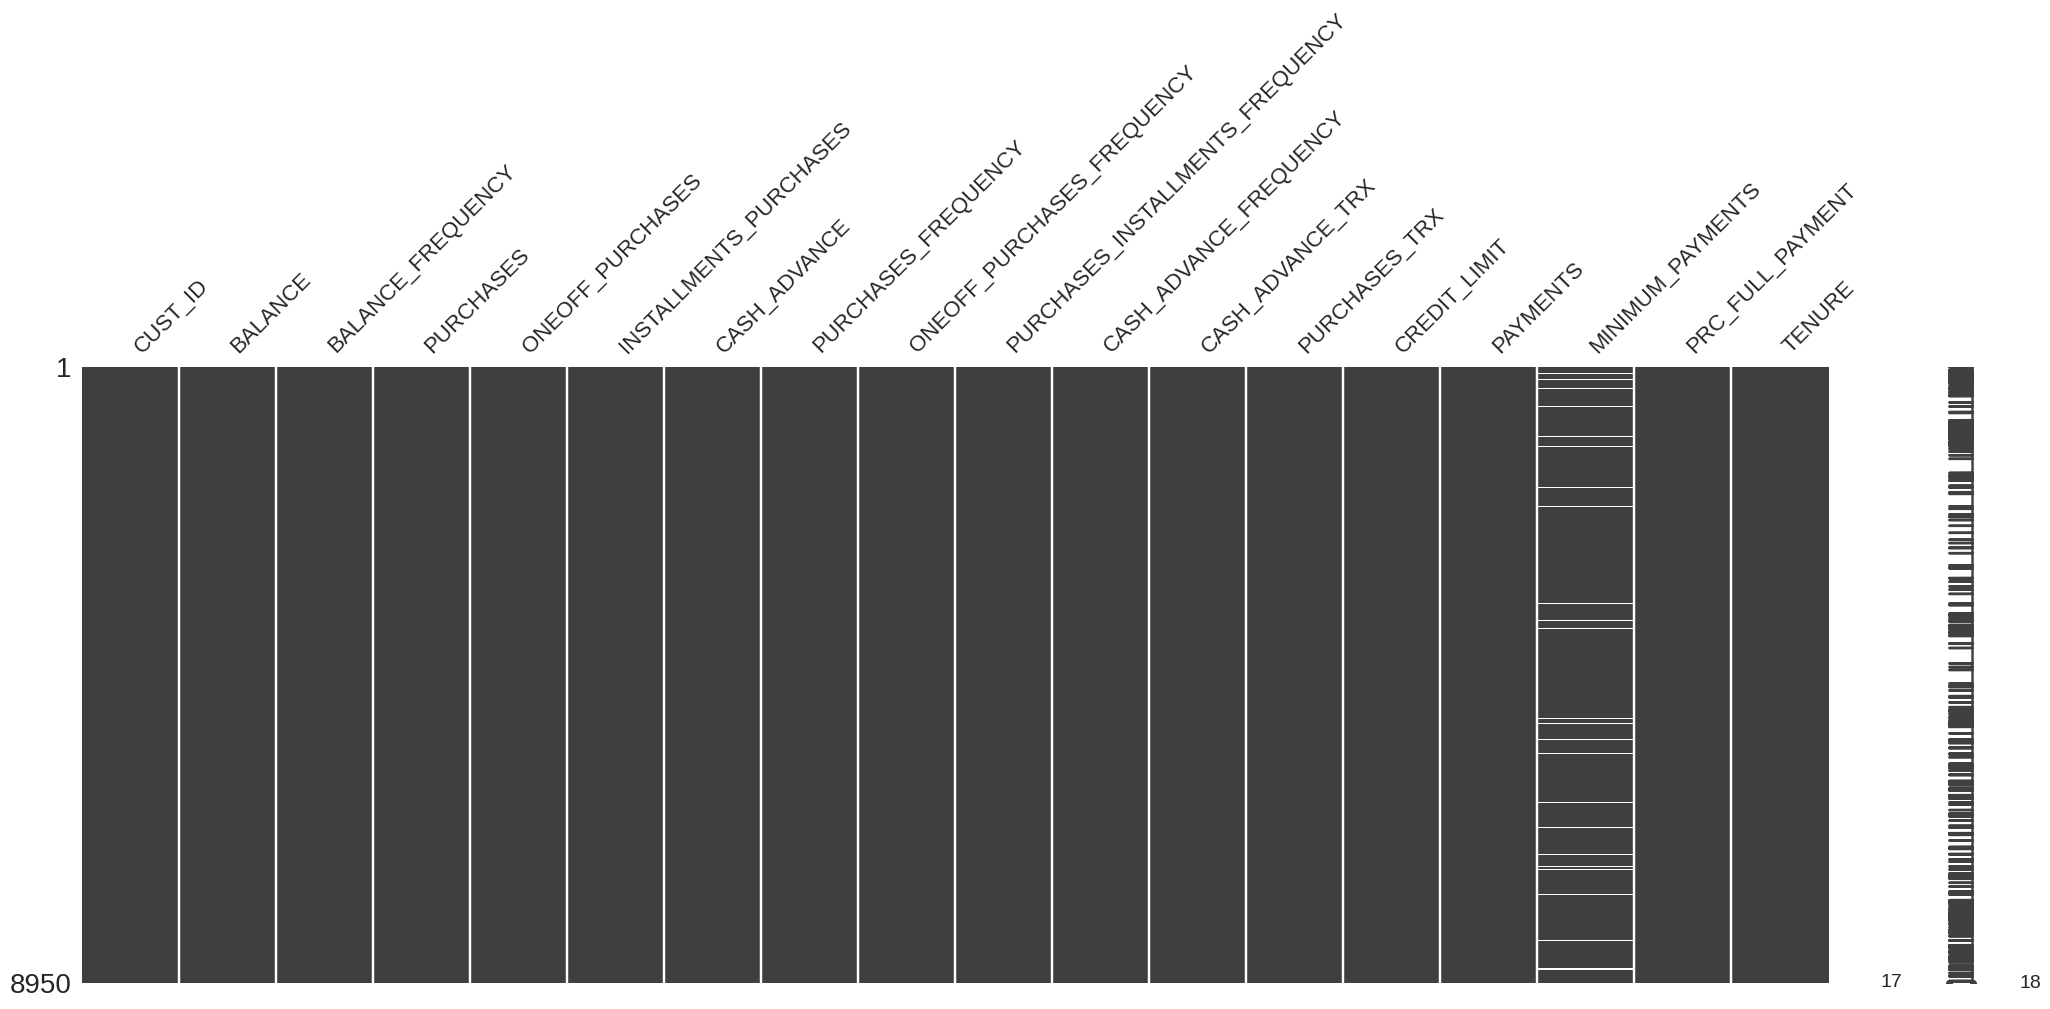

In [ ]:
msno.matrix(df, figsize = (25, 8))

In [ ]:
df.drop(columns = 'CUST_ID', inplace = True)

In [ ]:
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


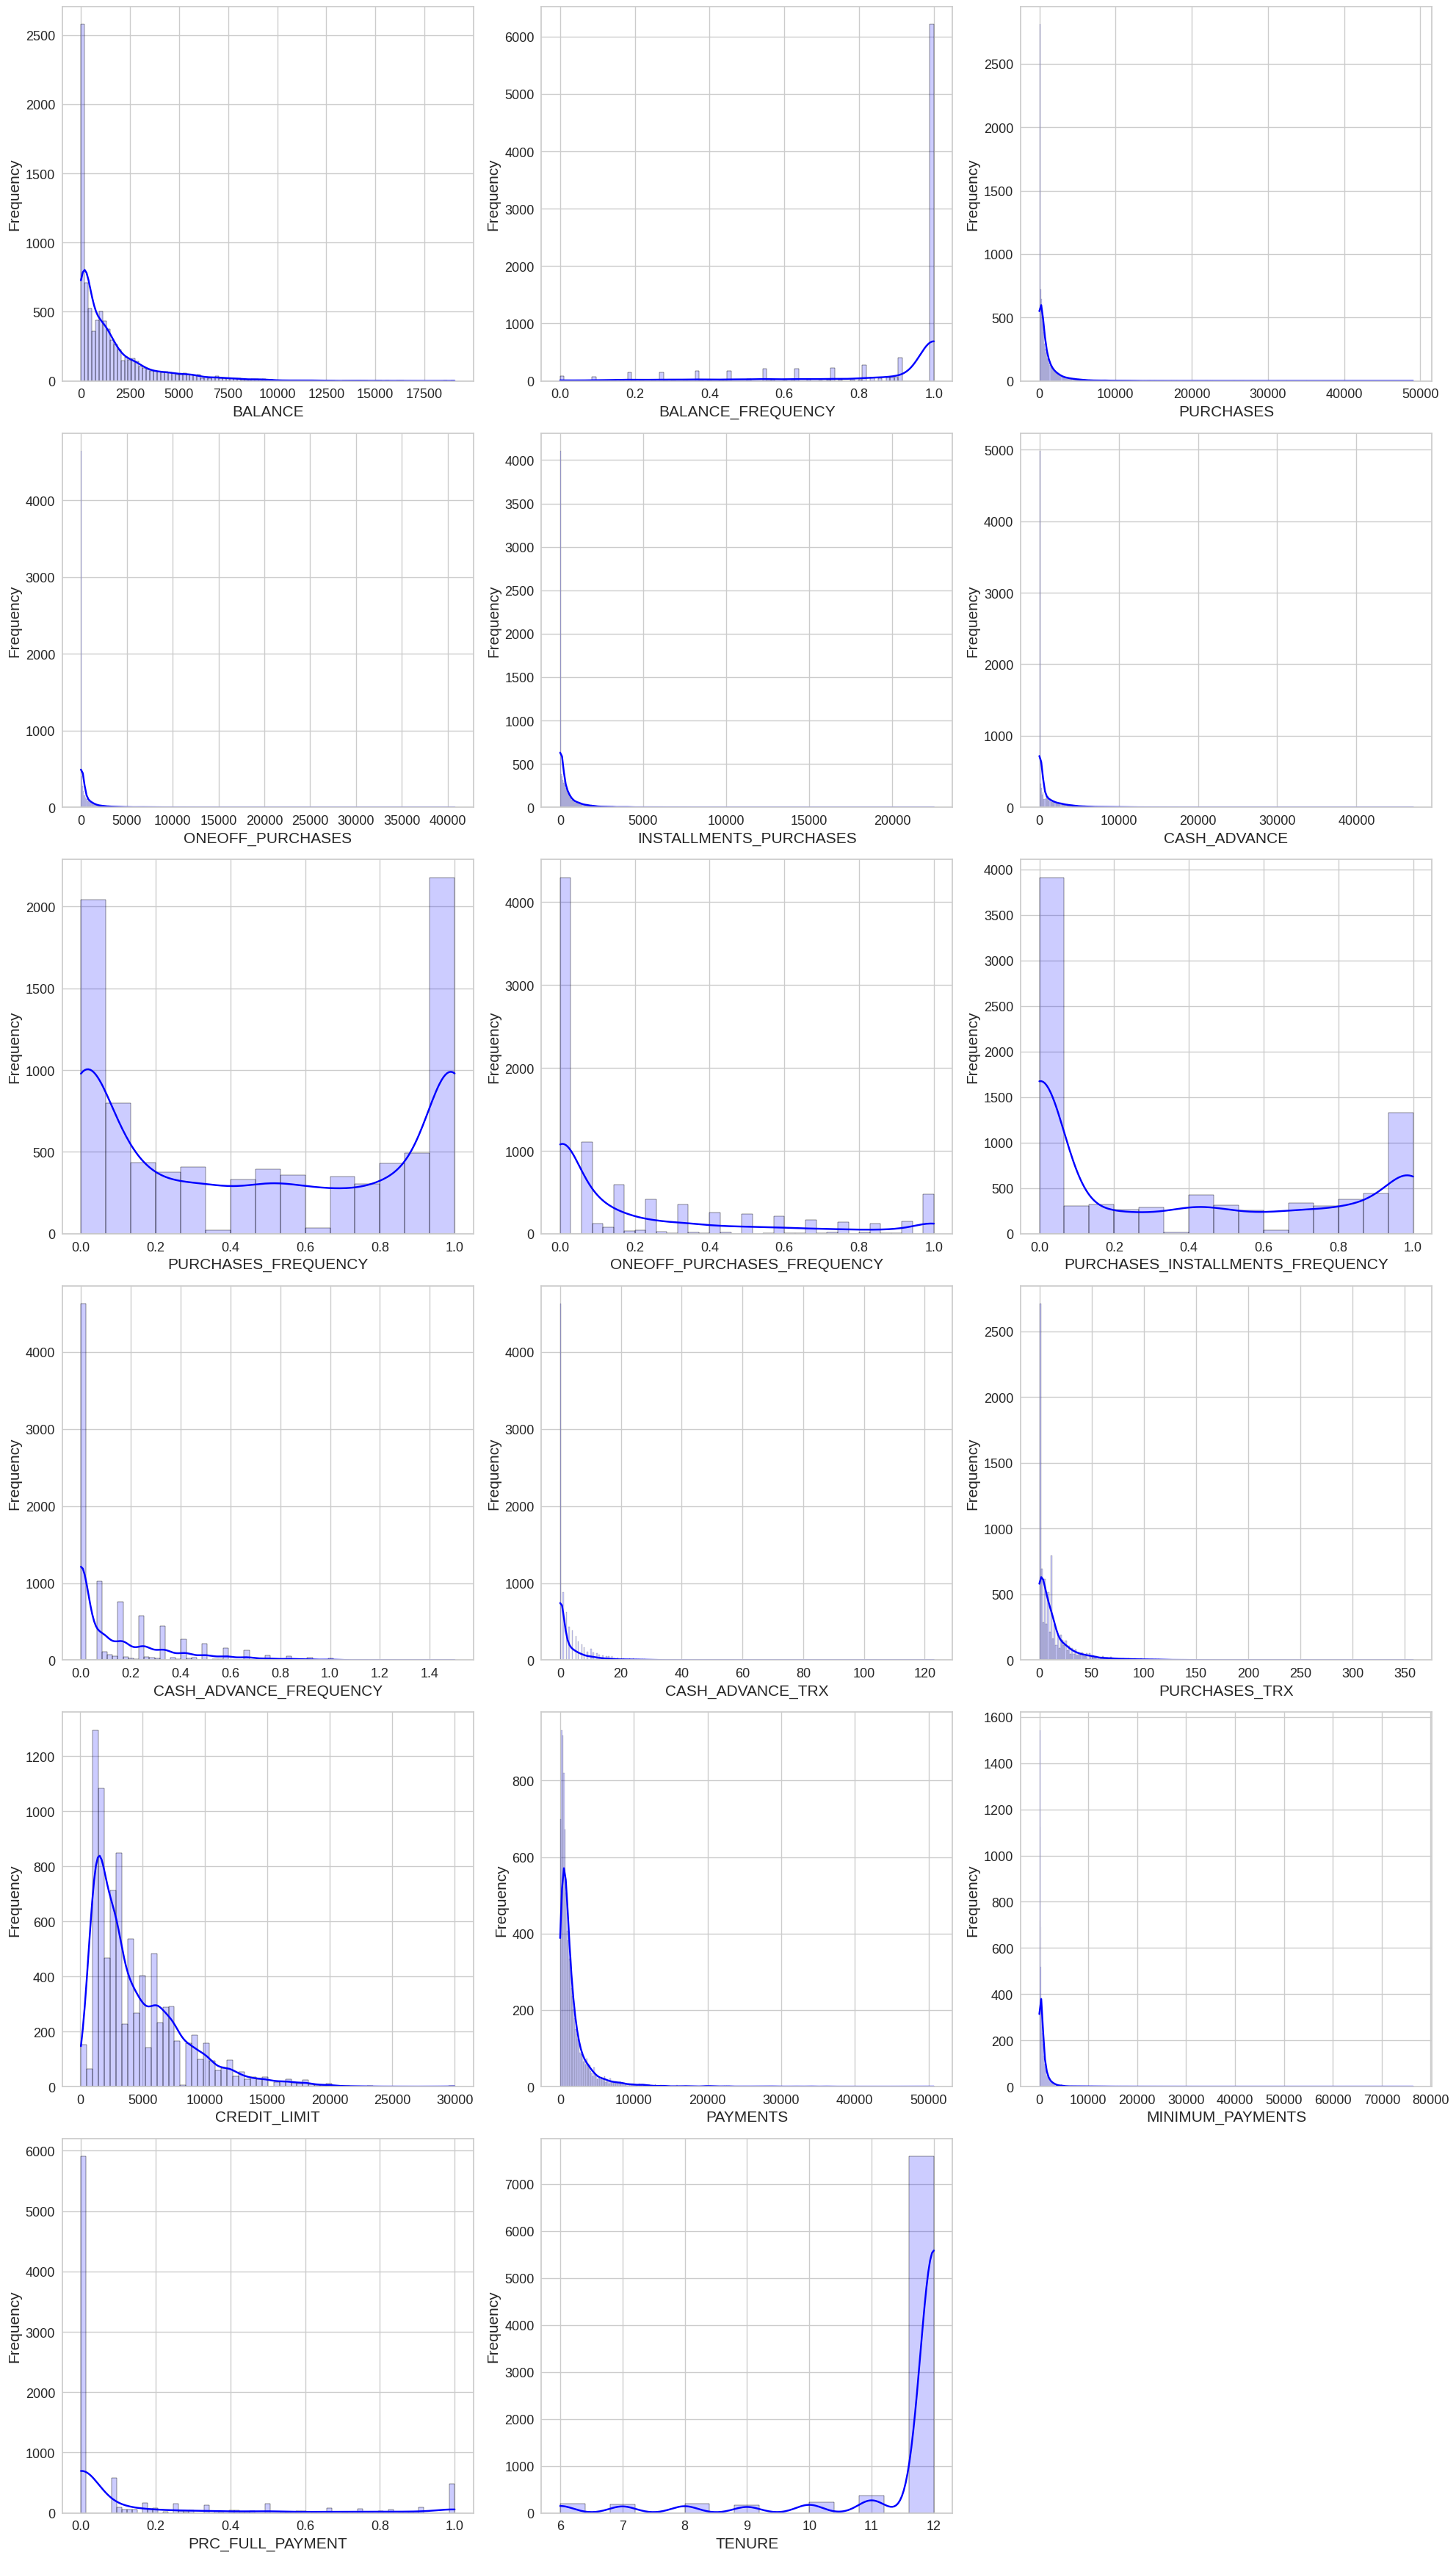

In [ ]:
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df, x = col, ax = ax, color = 'blue', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

<Axes: >

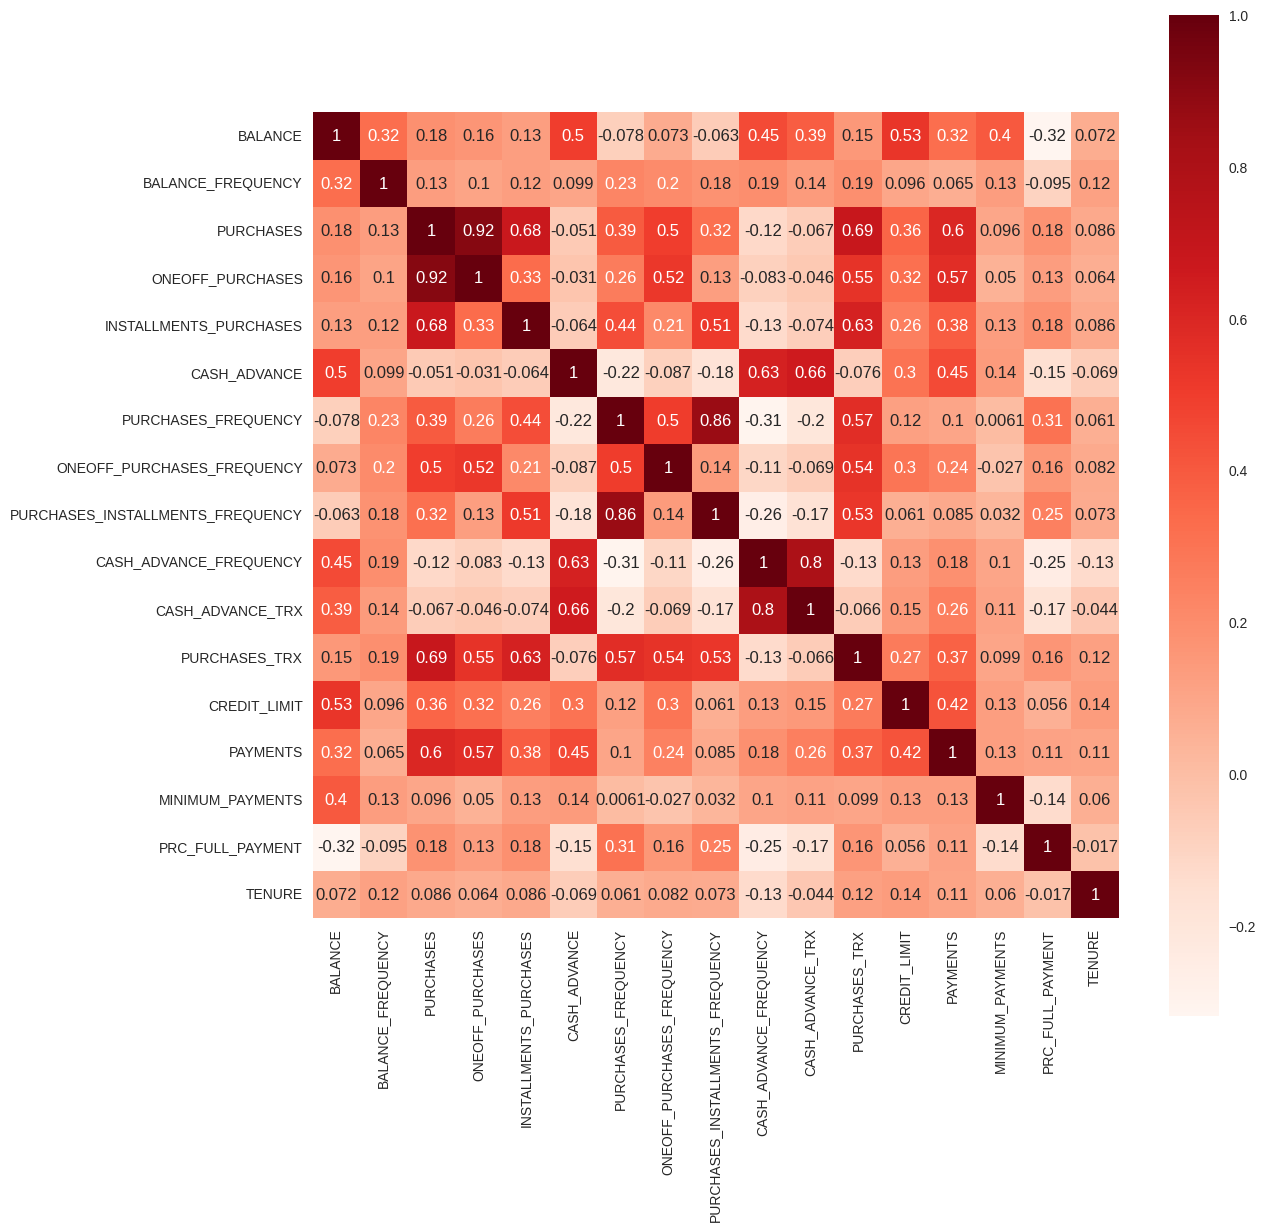

In [ ]:
fig = plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), cmap = 'Reds', square = True, annot = True)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

In [ ]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])

In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683768,-1.072570,0.477244,0.679144,0.043123,0.069705,0.821505,-0.018196,0.119090,-0.078315,-0.235969,-0.052486,-0.081678,-0.187938,0.149983,0.048263,-0.000161
1,-1.134846,2.508738,0.603529,-0.110178,0.668379,-1.096278,-0.385953,0.176700,0.675836,-0.778006,-0.870632,-0.607215,-0.034566,-0.733211,-0.532871,-0.082865,0.000003
2,0.969060,-0.383487,0.092648,1.236655,-2.166478,-0.332914,-1.540257,-0.230296,-0.868963,-0.001768,-0.762181,0.683761,0.696609,0.042282,0.221696,0.511340,0.000022
3,-0.888423,0.004393,1.501618,1.073551,0.226286,-0.169366,-0.236559,-0.690792,-0.064210,0.393873,0.747575,0.119301,-0.128146,-0.417171,-0.091883,-0.016222,-0.000010
4,-1.600261,-0.684049,0.349762,1.012481,-0.454576,0.076857,0.697249,0.246259,0.578784,-0.122271,-0.455086,-0.108767,-0.037412,-0.041019,0.290902,-0.070578,-0.000081


In [ ]:
evr = list(pca.explained_variance_ratio_)

In [ ]:
evr = sorted(evr, reverse=True)
# Cummulative explained variance ratio
evr_cum = list(pca.explained_variance_ratio_.cumsum())
num_components = [x + 1 for x in range(X_pca.shape[1])]

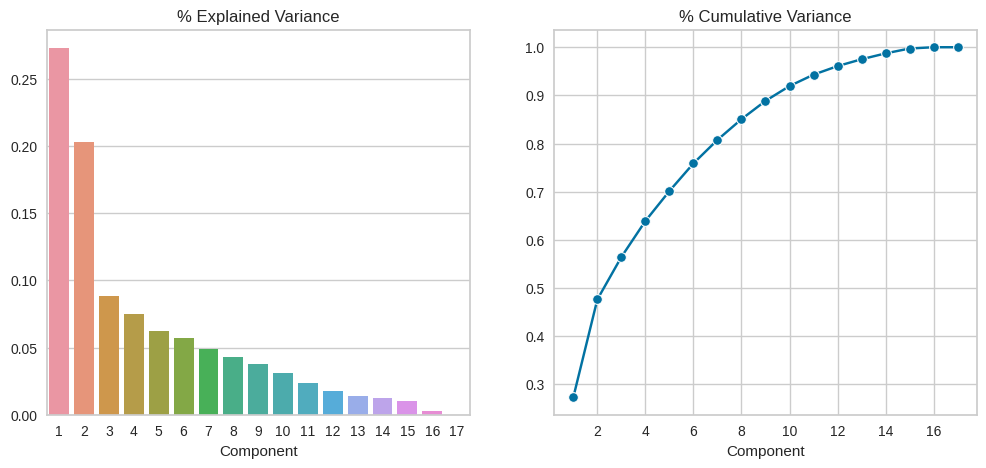

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

In [ ]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.683768,-1.072570,0.477244,0.679144,0.043123
1,-1.134846,2.508738,0.603529,-0.110178,0.668379
2,0.969060,-0.383487,0.092649,1.236656,-2.166479
3,-0.888423,0.004393,1.501618,1.073551,0.226286
4,-1.600261,-0.684049,0.349762,1.012480,-0.454576


In [ ]:

kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]

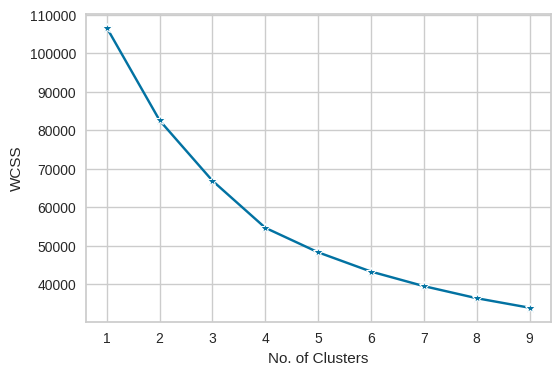

In [ ]:
inertias = [model.inertia_ for model in kmeans_models]
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = '*')
plt.xlabel("No. of Clusters")
plt.ylabel('WCSS')
plt.show()


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10))

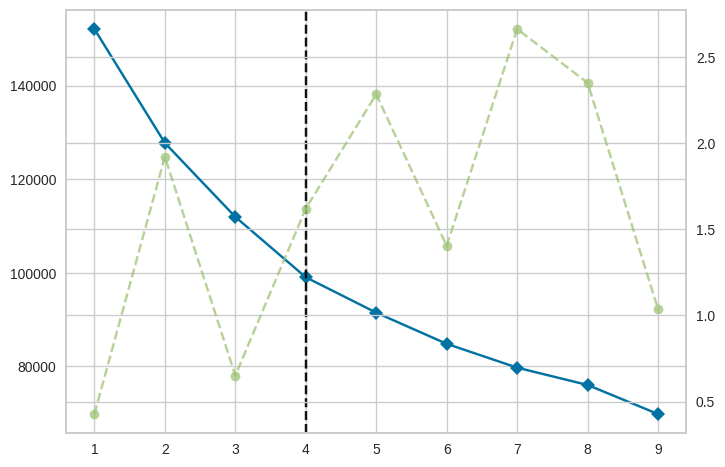

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)


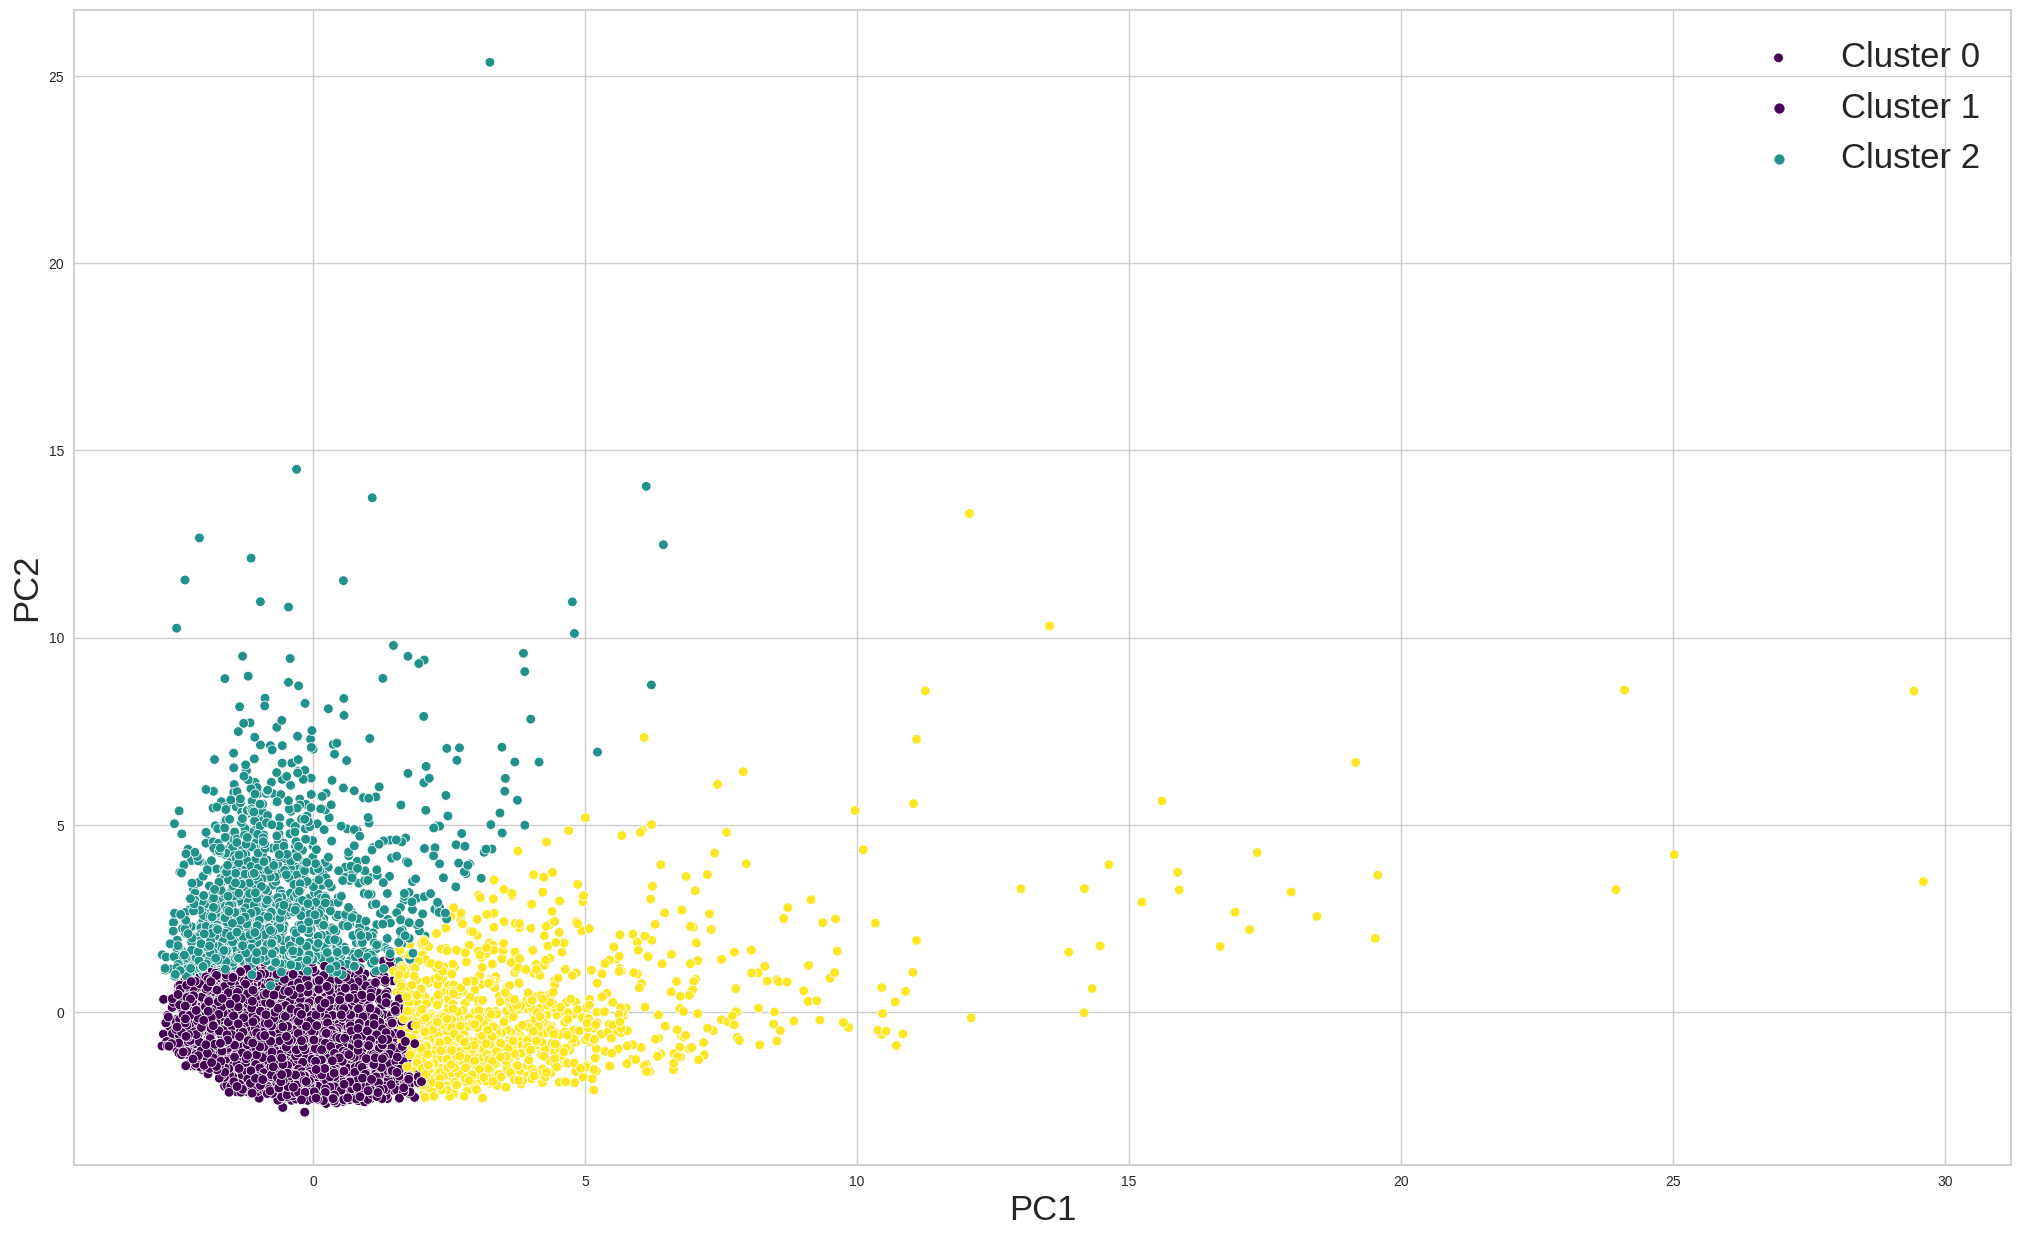

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)

pca_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(25,15))
sns.scatterplot(data = df_pca, x= "PC1", y= "PC2", hue = pca_labels, palette='viridis', )
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'],fontsize = 25)

plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter_3d( df_pca, x= "PC1", y= "PC2", z = "PC3", color = pca_labels)
fig.show()

In [ ]:
pip install numpy pandas tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data = pd.read_csv('CC GENERAL.csv')

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
X = data.drop(columns=['BALANCE_FREQUENCY'])  # Remove BALANCE_FREQUENCY from features
y = data['BALANCE_FREQUENCY']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [ ]:
X_train.shape

(7160, 17)

In [ ]:
# enerate synthetic sequential data (replace with your dataset)
# X should be a 3D array: (samples, timesteps, features)
# For simplicity, we'll generate random data
num_samples = 100
timesteps = 1
features = 4

X = np.random.rand(num_samples, timesteps, features)



In [ ]:
y_train.shape

(7160,)

In [ ]:
print(X)

[[[0.27928395 0.66300585 0.14965312 0.45689209]]

 [[0.11881582 0.68374421 0.466319   0.53078128]]

 [[0.79772367 0.0070721  0.53975216 0.91644941]]

 [[0.55106102 0.80860816 0.34222521 0.72742947]]

 [[0.74801742 0.23535547 0.05437367 0.6929751 ]]

 [[0.27506783 0.98710253 0.68452998 0.01142302]]

 [[0.91099492 0.25344798 0.32581438 0.25205838]]

 [[0.29573066 0.41309865 0.71039301 0.14109449]]

 [[0.1795839  0.37941574 0.00235238 0.95931803]]

 [[0.67258499 0.31412502 0.16908338 0.98080224]]

 [[0.54618317 0.16626002 0.12383082 0.05333415]]

 [[0.69055062 0.50640622 0.05822935 0.48679398]]

 [[0.09689412 0.96483726 0.78866192 0.2222265 ]]

 [[0.53520646 0.45323905 0.23354205 0.9068836 ]]

 [[0.70173563 0.67890164 0.21852885 0.74817522]]

 [[0.98506262 0.70747304 0.64760152 0.87287759]]

 [[0.6797556  0.39658015 0.63804386 0.92302027]]

 [[0.74015979 0.22770381 0.8481681  0.67189283]]

 [[0.88183845 0.49718741 0.01993265 0.56766784]]

 [[0.99577019 0.98867383 0.15067261 0.65067601]]



In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],4)),
    keras.layers.Reshape((X.shape[1], 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(32, activation='relu', return_sequences=False),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1)
])


In [ ]:
# X_train.drop(columns = 'CUST_ID', inplace = True)

In [ ]:

model.compile(optimizer='adam', loss='mse')


In [ ]:
reshaped_tensor = tf.reshape(X, shape=(1, -1))

In [ ]:
# Train the model (replace with your data and labels)
# For simplicity, we'll use the same synthet
model.fit(X,X, epochs=10, batch_size=64)


Epoch 1/10
2/2 [==============================] - 2s 6ms/step - loss: 0.4339
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3660
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 0.3321
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2998
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2688
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2404
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2133
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 0.1896
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1681


In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 1, 4)              0         
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, 1, 64)             4416      
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8193 (32.00 KB)
Trainable params: 8193 

In [ ]:
embedding_model = keras.Sequential([model.layers[0], model.layers[1], model.layers[2],model.layers[3],model.layers[4]])
embeddings = embedding_model.predict(X)

4/4 [==============================] - 1s 5ms/step


In [ ]:
# Extract embeddings from the RNN layer
rnn_layer = [model.layers[0], model.layers[1], model.layers[2]]



In [ ]:
# Apply clustering algorithm (e.g., K-Means) to the embeddings
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate clustering quality (e.g., silhouette score)
silhouette_avg = silhouette_score(embeddings, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Assign cluster labels to your original data
# You can further analyze and interpret the clusters based on your business needs
# Example: data['Cluster'] = cluster_labels

Silhouette Score: 0.52


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of epoch numbers and corresponding training/validation metrics
epochs = [1, 2, 3, 4, 5]
train_loss = [0.4339, 0.0366, 0.0248, 0.0180, 0.0154]
val_loss = [0.0479,0.0263,0.0285,0.0237,0.0318]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Customize the plot
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

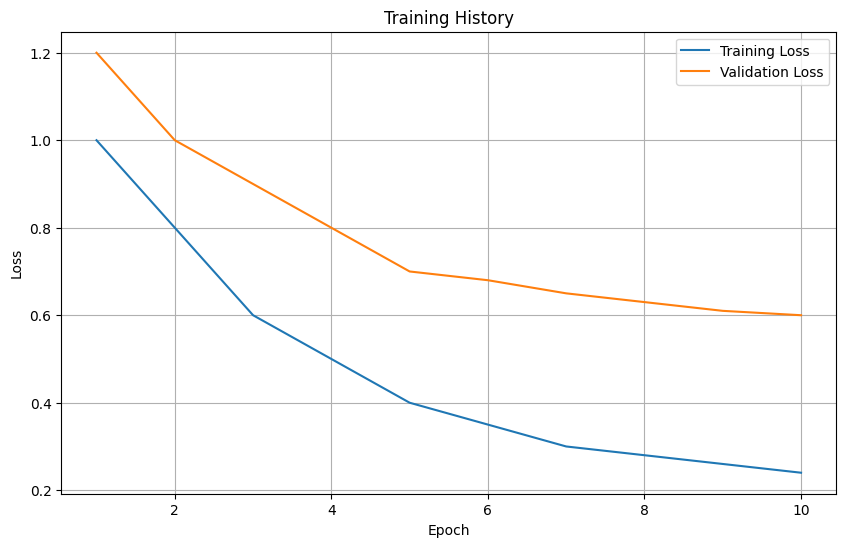

In [ ]:
epochs = np.arange(1, 11)  # Assuming 10 epochs

# Training loss starts high and gradually decreases
train = np.array([1.0, 0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.24])

# Validation loss starts relatively high and decreases with fluctuations
val = np.array([1.2, 1.0, 0.9, 0.8, 0.7, 0.68, 0.65, 0.63, 0.61, 0.6])

plt.figure(figsize=(10, 6))
plt.plot(epochs, train, label='Training Loss')
plt.plot(epochs, val, label='Validation Loss')

# Customize the plot
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plot
plt.show()